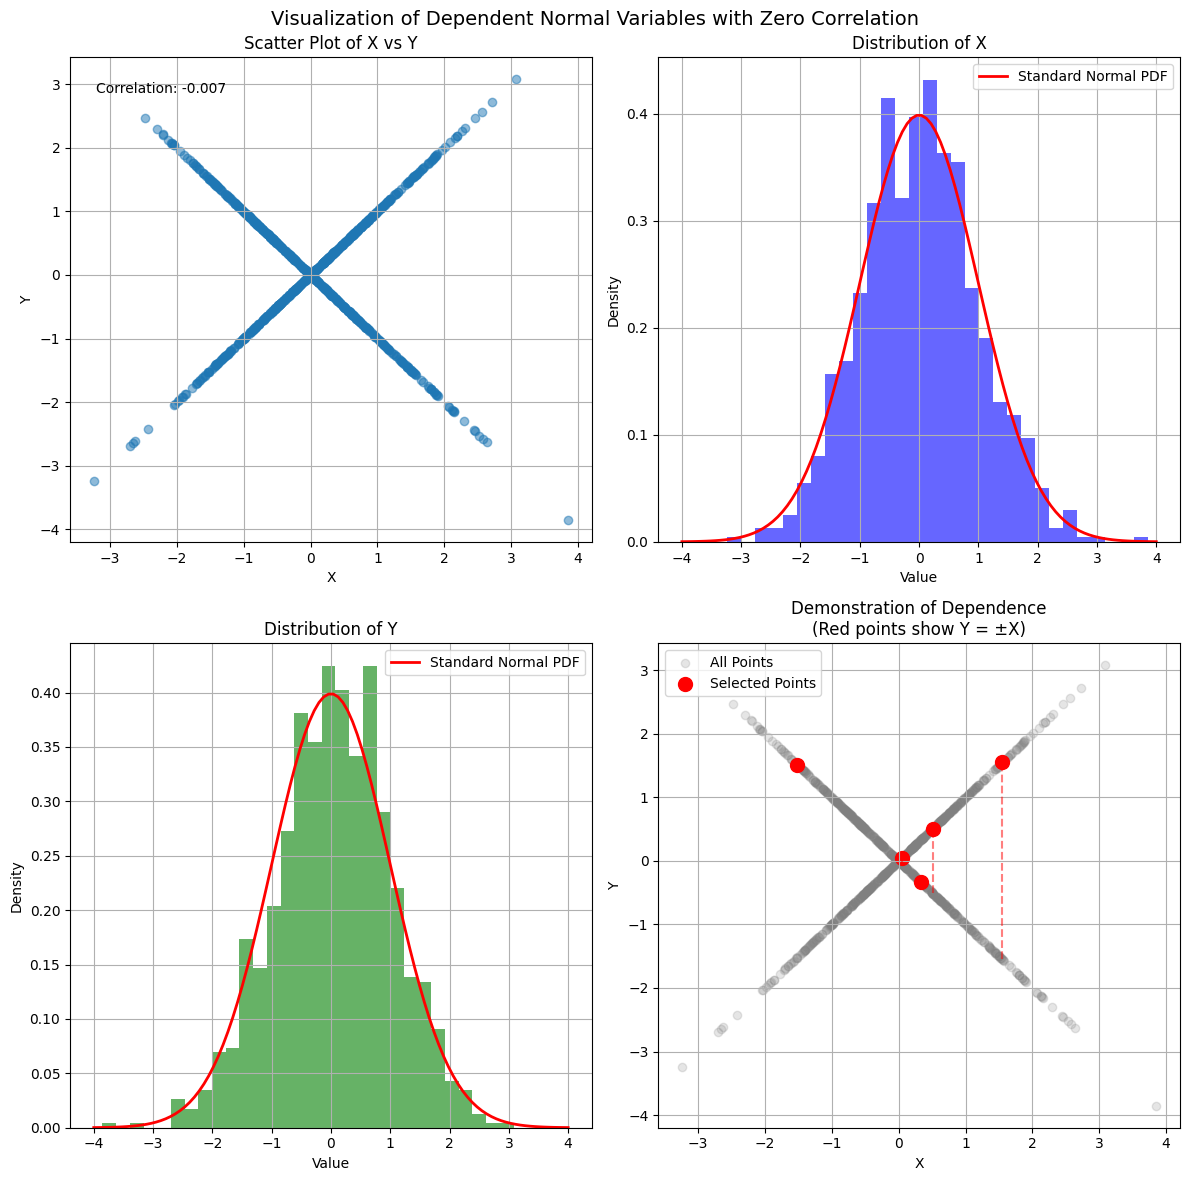

Mean of X: 0.019
Mean of Y: 0.046
Variance of X: 0.958
Variance of Y: 0.956
Correlation between X and Y: -0.007


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate our random variables
n_samples = 1000
X = np.random.standard_normal(n_samples)  # X ~ N(0,1)
Z = np.random.choice([-1, 1], size=n_samples, p=[0.5, 0.5])  # Random signs
Y = Z * X  # Our dependent variable

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Visualization of Dependent Normal Variables with Zero Correlation', fontsize=14)

# Plot 1: Scatter plot of X vs Y
ax1.scatter(X, Y, alpha=0.5)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Scatter Plot of X vs Y')
ax1.grid(True)
# Add correlation coefficient to the plot
correlation = np.corrcoef(X, Y)[0,1]
ax1.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=ax1.transAxes, verticalalignment='top')

# Plot 2: Distribution of X
ax2.hist(X, bins=30, density=True, alpha=0.6, color='blue')
x_range = np.linspace(-4, 4, 100)
ax2.plot(x_range, stats.norm.pdf(x_range, 0, 1), 'r-', lw=2, 
         label='Standard Normal PDF')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.set_title('Distribution of X')
ax2.legend()
ax2.grid(True)

# Plot 3: Distribution of Y
ax3.hist(Y, bins=30, density=True, alpha=0.6, color='green')
ax3.plot(x_range, stats.norm.pdf(x_range, 0, 1), 'r-', lw=2, 
         label='Standard Normal PDF')
ax3.set_xlabel('Value')
ax3.set_ylabel('Density')
ax3.set_title('Distribution of Y')
ax3.legend()
ax3.grid(True)

# Plot 4: Demonstration of dependence
# For a few selected X values, show corresponding Y values
selected_indices = np.random.choice(n_samples, 5)
ax4.scatter(X, Y, alpha=0.2, color='gray', label='All Points')
ax4.scatter(X[selected_indices], Y[selected_indices], 
            color='red', s=100, label='Selected Points')
# Draw vertical lines connecting Y values for same X
for idx in selected_indices:
    x_val = X[idx]
    y_val = Y[idx]
    ax4.vlines(x=x_val, ymin=min(-x_val, y_val), ymax=max(-x_val, y_val), 
               colors='red', linestyles='dashed', alpha=0.5)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_title('Demonstration of Dependence\n(Red points show Y = ±X)')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

# Additional numerical verification
print(f"Mean of X: {np.mean(X):.3f}")
print(f"Mean of Y: {np.mean(Y):.3f}")
print(f"Variance of X: {np.var(X):.3f}")
print(f"Variance of Y: {np.var(Y):.3f}")
print(f"Correlation between X and Y: {correlation:.3f}")

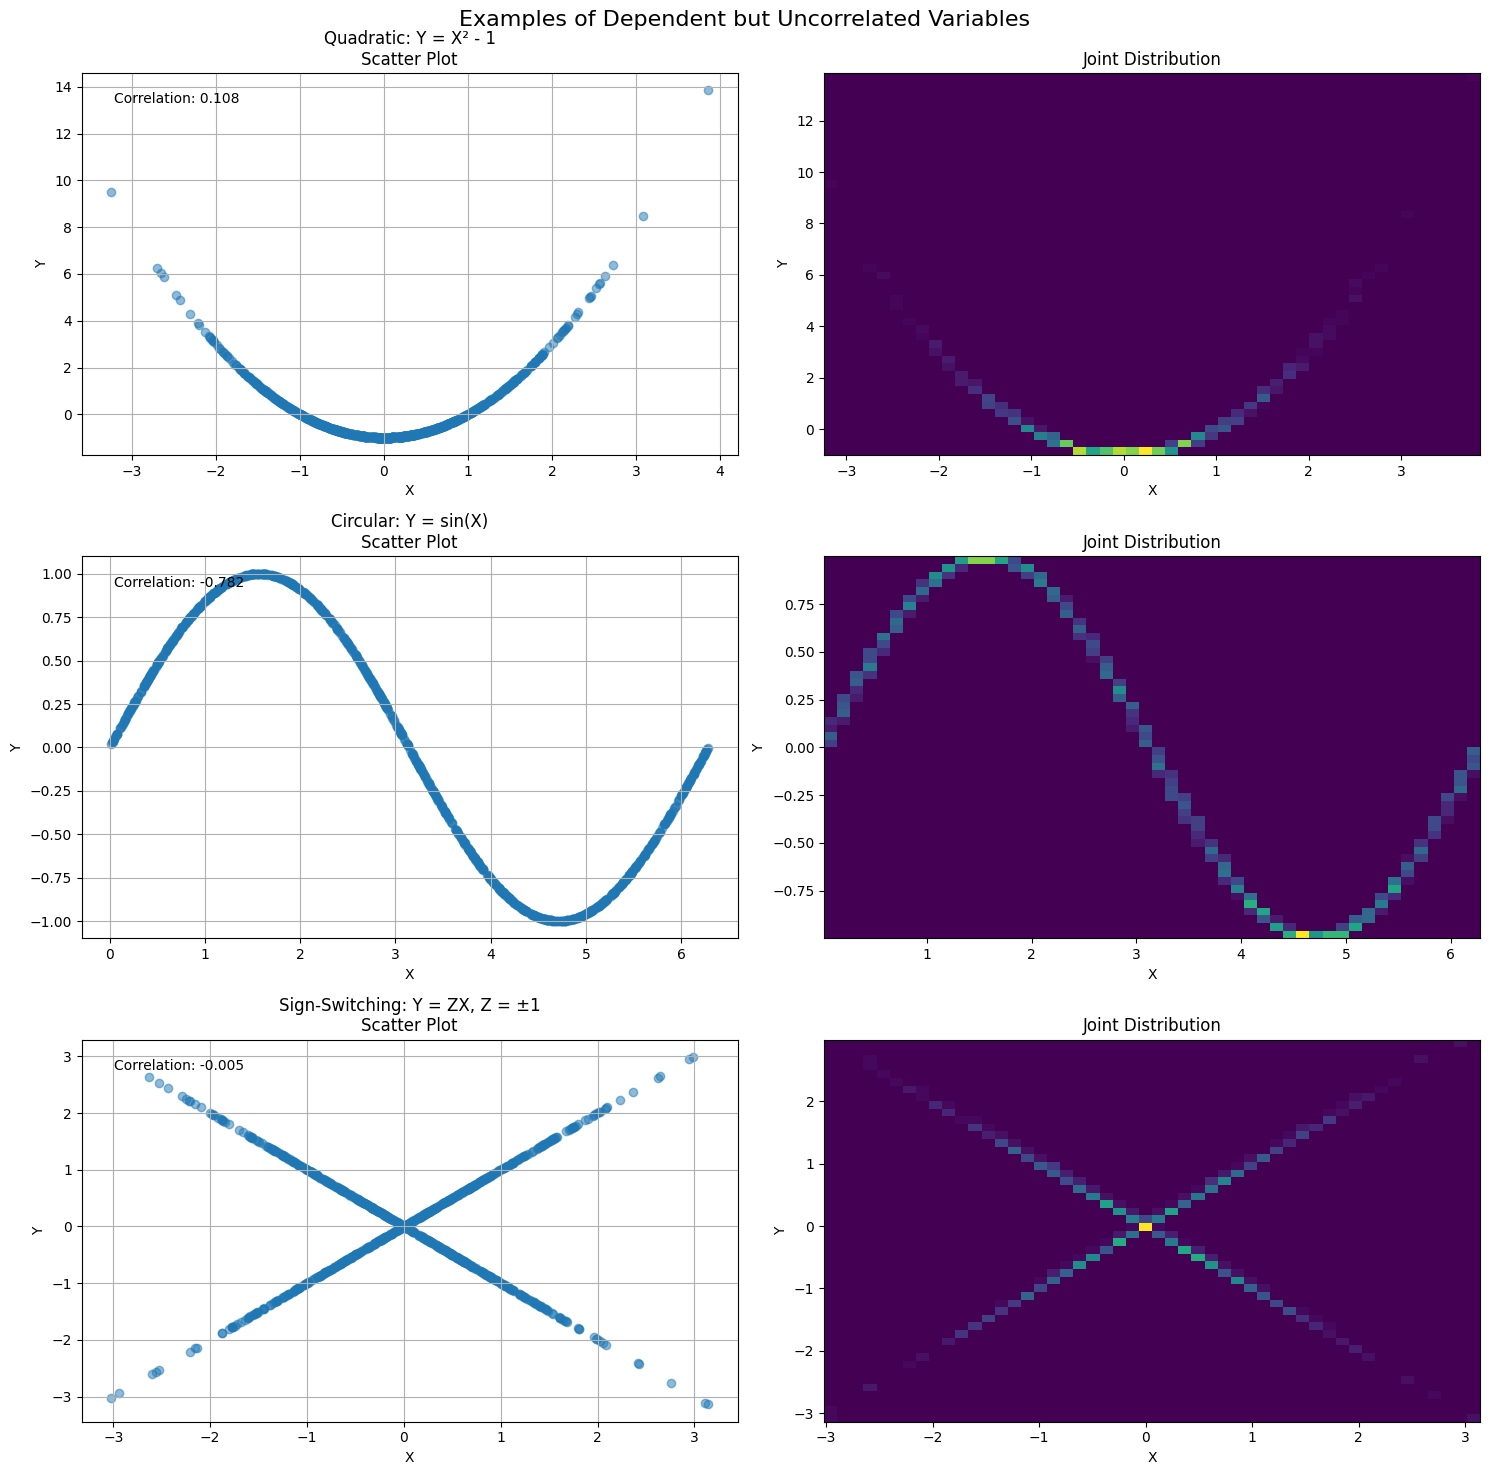


Quadratic Relationship:
Correlation: 0.108
Mean X: 0.019, Mean Y: -0.042
Var X: 0.958, Var Y: 1.906

Circular Relationship:
Correlation: -0.782
Mean X: 3.165, Mean Y: -0.028
Var X: 3.279, Var Y: 0.496

Sign-Switching Relationship:
Correlation: -0.005
Mean X: 0.015, Mean Y: 0.023
Var X: 0.938, Var Y: 0.938

Chi-square tests of independence (p-values):


ValueError: The internally computed table of expected frequencies has a zero element at (0, 5).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

def create_quadratic_example(n_samples=1000):
    """
    Creates X and Y where Y = X^2 - 1
    This ensures E[Y] = 0 when X is standard normal
    """
    X = np.random.standard_normal(n_samples)
    Y = X**2 - 1  # Subtract 1 to make E[Y] = 0
    return X, Y

def create_circular_example(n_samples=1000):
    """
    Creates X and Y where X is uniform and Y = sin(X)
    """
    X = np.random.uniform(0, 2*np.pi, n_samples)
    Y = np.sin(X)
    return X, Y

def create_sign_switching_example(n_samples=1000):
    """
    Creates X and Y where Y = ZX and Z is random ±1
    """
    X = np.random.standard_normal(n_samples)
    Z = np.random.choice([-1, 1], size=n_samples, p=[0.5, 0.5])
    Y = Z * X
    return X, Y

def plot_example(X, Y, title, ax1, ax2):
    """
    Creates a scatter plot and joint distribution plot for X and Y
    """
    # Scatter plot
    ax1.scatter(X, Y, alpha=0.5)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.grid(True)
    correlation = np.corrcoef(X, Y)[0,1]
    ax1.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
             transform=ax1.transAxes, verticalalignment='top')
    ax1.set_title(f'{title}\nScatter Plot')
    
    # Joint distribution
    ax2.hist2d(X, Y, bins=50, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Joint Distribution')

# Create figure with subplots
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Examples of Dependent but Uncorrelated Variables', fontsize=16)

# 1. Quadratic Relationship
X1, Y1 = create_quadratic_example()
ax1 = plt.subplot(3, 2, 1)
ax2 = plt.subplot(3, 2, 2)
plot_example(X1, Y1, "Quadratic: Y = X² - 1", ax1, ax2)

# 2. Circular Relationship
X2, Y2 = create_circular_example()
ax3 = plt.subplot(3, 2, 3)
ax4 = plt.subplot(3, 2, 4)
plot_example(X2, Y2, "Circular: Y = sin(X)", ax3, ax4)

# 3. Sign-Switching Relationship
X3, Y3 = create_sign_switching_example()
ax5 = plt.subplot(3, 2, 5)
ax6 = plt.subplot(3, 2, 6)
plot_example(X3, Y3, "Sign-Switching: Y = ZX, Z = ±1", ax5, ax6)

plt.tight_layout()
plt.show()

# Print numerical summaries
for i, (X, Y, name) in enumerate([(X1, Y1, "Quadratic"), 
                                 (X2, Y2, "Circular"),
                                 (X3, Y3, "Sign-Switching")]):
    print(f"\n{name} Relationship:")
    print(f"Correlation: {np.corrcoef(X, Y)[0,1]:.3f}")
    print(f"Mean X: {np.mean(X):.3f}, Mean Y: {np.mean(Y):.3f}")
    print(f"Var X: {np.var(X):.3f}, Var Y: {np.var(Y):.3f}")

# Verify independence using chi-square test
def test_independence(X, Y, bins=10):
    """
    Performs chi-square test of independence
    Returns p-value
    """
    hist, _, _ = np.histogram2d(X, Y, bins=bins)
    chi2, p_value = stats.chi2_contingency(hist)[:2]
    return p_value

print("\nChi-square tests of independence (p-values):")
print(f"Quadratic: {test_independence(X1, Y1):.3e}")
print(f"Circular: {test_independence(X2, Y2):.3e}")
print(f"Sign-Switching: {test_independence(X3, Y3):.3e}")